# Monkey portfolios

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Get rid of findfont: Font family 'Arial' not found.
# when running a remote notebook on Jupyter Server on Ubuntu Linux server
import logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

In [3]:
from cvx.simulator import Builder
pd.options.plotting.backend = "plotly"

In [4]:
prices = pd.read_csv("data/stock-prices.csv", header=0, index_col=0, parse_dates=True)

In [5]:
b = Builder(prices=prices, initial_aum=1e6)

np.random.seed(42)
for time, state in b:
    n = len(state.assets)
    w = np.random.rand(n)
    # normalize the weights
    w = w/np.sum(w)
    
    assert np.all(w >= 0)
    assert np.allclose(np.sum(w), 1)

    b.weights = w 
    b.aum = state.aum

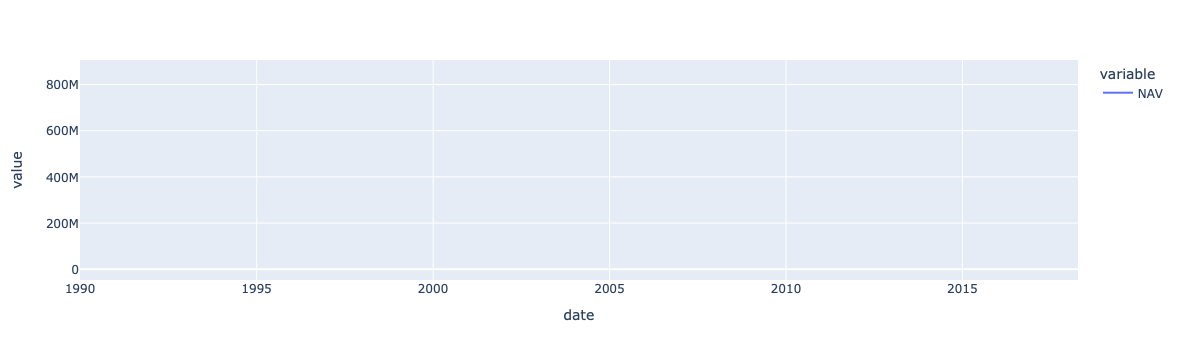

In [6]:
portfolio = b.build()
portfolio.nav.plot()

In [7]:
b = Builder(prices=prices, initial_aum=1e6)

np.random.seed(42)
for time, state in b:
    n = len(state.assets)
    w = np.random.rand(n)
    # normalize the weights
    w = w/np.sum(w)
    
    assert np.all(w >= 0)
    assert np.allclose(np.sum(w), 1)

    # multiply the shares with a constant portfolio size
    b.weights = w
    b.aum = state.aum

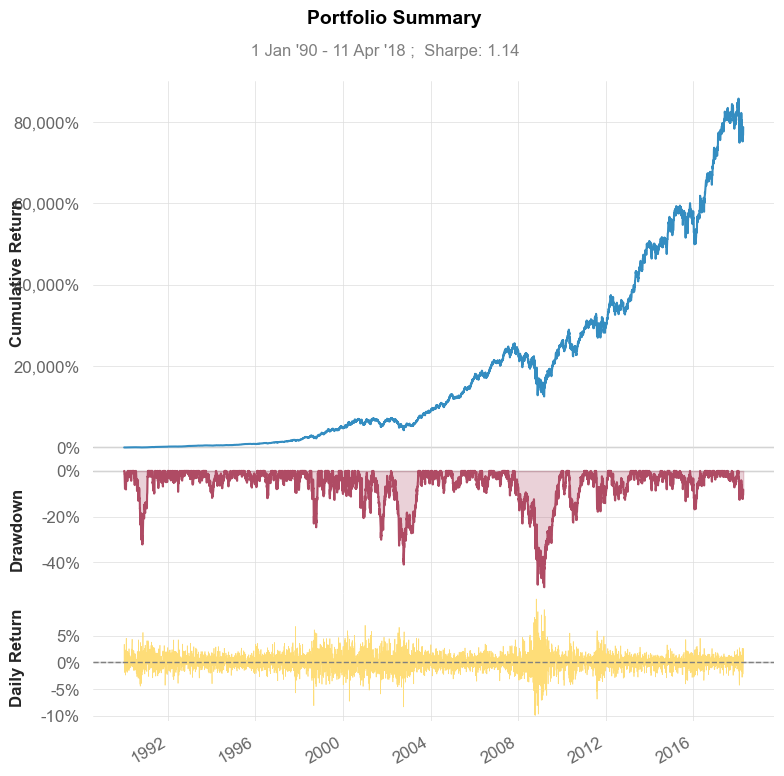

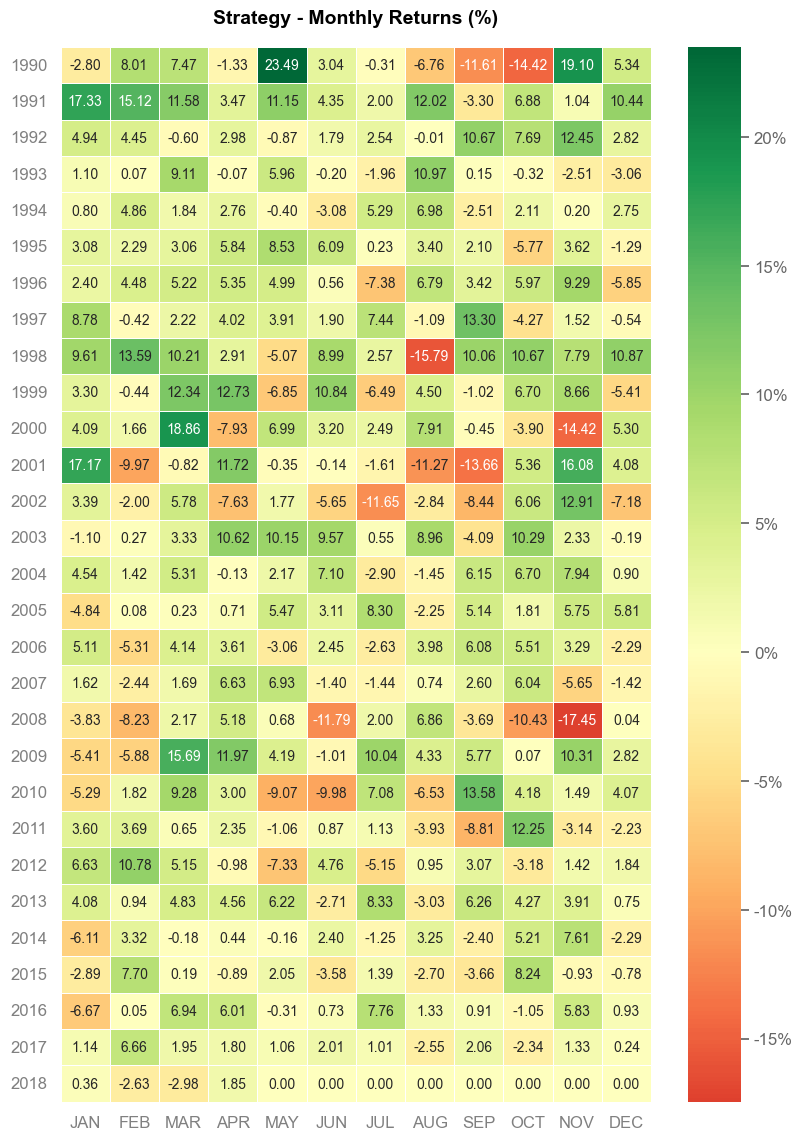

In [8]:
portfolio = b.build()
portfolio.plots()